In [40]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [5]:
# List of NBA team abbreviations
teams = [
    "ATL", "BOS", "BRK", "CHO", "CHI", "CLE", "DAL", "DEN", "DET", "GSW",
    "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK",
    "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"
]

# Season year
year = 2024

# Base URL for NBA
base_url = "https://www.basketball-reference.com/teams/{TEAM}/{YEAR}_games.html"

# empty list to store data
all_teams_data = []

# Loop through each team
for team in teams:
    print(f"Fetching data for {team}...")
    try:
        # Construct the URL for the team
        url = base_url.format(TEAM=team, YEAR=year)
        
        # Read the table from the page
        tables = pd.read_html(url)
        
        # Select the main schedule table (usually the first table)
        schedule = tables[0]  # Adjust index if necessary
        
        # Add a column for the team
        schedule['Team'] = team
        
        # Append to the list
        all_teams_data.append(schedule)
    except Exception as e:
        print(f"Failed to fetch data for {team}: {e}")

# Combine all teams into one DataFrame
combined_data = pd.concat(all_teams_data, ignore_index=True)

# Save to a CSV file
combined_data.to_csv(f"nba_{year}_season_data.csv", index=False)

print(f"All team data combined and saved as 'nba_{year}_season_data.csv'.")

Fetching data for ATL...
Fetching data for BOS...
Fetching data for BRK...
Fetching data for CHO...
Fetching data for CHI...
Fetching data for CLE...
Fetching data for DAL...
Fetching data for DEN...
Fetching data for DET...
Fetching data for GSW...
Fetching data for HOU...
Fetching data for IND...
Fetching data for LAC...
Fetching data for LAL...
Fetching data for MEM...
Fetching data for MIA...
Fetching data for MIL...
Fetching data for MIN...
Fetching data for NOP...
Fetching data for NYK...
Fetching data for OKC...
Fetching data for ORL...
Fetching data for PHI...
Fetching data for PHO...
Fetching data for POR...
Fetching data for SAC...
Fetching data for SAS...
Fetching data for TOR...
Fetching data for UTA...
Fetching data for WAS...
All team data combined and saved as 'nba_2024_season_data.csv'.


In [41]:
# confirmed it only includes regular season data (and not playoff)
nba_2024 = pd.read_csv('nba_2024_season_data.csv')
nba_2024[nba_2024['Team'] == 'BOS']

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
87,1,"Wed, Oct 25, 2023",7:00p,NaN,Box Score,@,New York Knicks,W,NaN,108,104,1,0,W 1,19812,2:39,NaN,BOS
88,2,"Fri, Oct 27, 2023",7:30p,NaN,Box Score,NaN,Miami Heat,W,NaN,119,111,2,0,W 2,19156,2:20,NaN,BOS
89,3,"Mon, Oct 30, 2023",7:00p,NaN,Box Score,@,Washington Wizards,W,NaN,126,107,3,0,W 3,17898,2:06,NaN,BOS
90,4,"Wed, Nov 1, 2023",7:30p,NaN,Box Score,NaN,Indiana Pacers,W,NaN,155,104,4,0,W 4,19156,2:03,NaN,BOS
91,5,"Sat, Nov 4, 2023",8:00p,NaN,Box Score,@,Brooklyn Nets,W,NaN,124,114,5,0,W 5,17983,2:10,NaN,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,79,"Tue, Apr 9, 2024",7:30p,NaN,Box Score,@,Milwaukee Bucks,L,NaN,91,104,62,17,L 1,17493,1:57,NaN,BOS
169,80,"Thu, Apr 11, 2024",7:30p,NaN,Box Score,NaN,New York Knicks,L,NaN,109,118,62,18,L 2,19156,2:04,NaN,BOS
170,G,Date,Start (ET),NaN,NaN,NaN,Opponent,NaN,NaN,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,BOS
171,81,"Fri, Apr 12, 2024",7:30p,NaN,Box Score,NaN,Charlotte Hornets,W,NaN,131,98,63,18,W 1,19156,1:56,NaN,BOS


In [42]:
# there are header rows
nba_2024[nba_2024['Date'] == 'Date'].head(2)

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
20,G,Date,Start (ET),NaN,NaN,NaN,Opponent,NaN,NaN,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,ATL
41,G,Date,Start (ET),NaN,NaN,NaN,Opponent,NaN,NaN,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,ATL


In [43]:
# remove header rows
nba_2024_v1 = nba_2024[~nba_2024['Date'].str.contains('Date', na=False)]

# confirm it worked
nba_2024_v1[nba_2024_v1['Date'] == 'Date']

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team


In [44]:
# clean up columns
nba_2024_v1['Unnamed: 3'].value_counts()

Series([], Name: count, dtype: int64)

In [45]:
nba_2024_v1['Unnamed: 4'].value_counts()

Unnamed: 4
Box Score    2472
Name: count, dtype: int64

In [46]:
nba_2024_v1['Unnamed: 5'].value_counts()

Unnamed: 5
@    1236
Name: count, dtype: int64

In [47]:
nba_2024_v1['Unnamed: 7'].value_counts()

Unnamed: 7
L    1236
W    1236
Name: count, dtype: int64

In [48]:
nba_2024_v1['Unnamed: 8'].value_counts()

Unnamed: 8
OT     102
2OT     16
Name: count, dtype: int64

In [49]:
# drop unecessary columns
nba_2024_v2 = nba_2024_v1.drop(columns=['Unnamed: 3', 'Unnamed: 4'])
nba_2024_v2.head(2)

,G,Date,Start (ET),Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
0,1,"Wed, Oct 25, 2023",7:00p,@,Charlotte Hornets,L,NaN,110,116,0,1,L 1,16129,2:22,NaN,ATL
1,2,"Fri, Oct 27, 2023",7:30p,NaN,New York Knicks,L,NaN,120,126,0,2,L 2,17692,2:11,NaN,ATL


In [50]:
# rename home/away column column
nba_2024_v2 = nba_2024_v2.rename(columns={'Unnamed: 5': 'Home?'})
nba_2024_v2['Home?'] = nba_2024_v2['Home?'].apply(lambda x: 'Y' if pd.isna(x) else 'N' if x == '@' else x)
nba_2024_v2.head(2)

,G,Date,Start (ET),Home?,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
0,1,"Wed, Oct 25, 2023",7:00p,N,Charlotte Hornets,L,NaN,110,116,0,1,L 1,16129,2:22,NaN,ATL
1,2,"Fri, Oct 27, 2023",7:30p,Y,New York Knicks,L,NaN,120,126,0,2,L 2,17692,2:11,NaN,ATL


In [51]:
# rename other columns for clarity/so they're the same as mlb dataset
nba_2024_v3 = nba_2024_v2.rename(columns={
    'Unnamed: 7': 'W/L',
    'Unnamed: 8': 'OT',
    'Tm': 'Hpts',
    'Opp': 'Apts',
    'Opponent' : 'Opp',
    'Attend.': 'Attendance',
    'Team': 'Tm'
})
nba_2024_v3

,G,Date,Start (ET),Home?,Opp,W/L,OT,Hpts,Apts,W,L,Streak,Attendance,LOG,Notes,Tm
0,1,"Wed, Oct 25, 2023",7:00p,N,Charlotte Hornets,L,NaN,110,116,0,1,L 1,16129,2:22,NaN,ATL
1,2,"Fri, Oct 27, 2023",7:30p,Y,New York Knicks,L,NaN,120,126,0,2,L 2,17692,2:11,NaN,ATL
2,3,"Sun, Oct 29, 2023",7:00p,N,Milwaukee Bucks,W,NaN,127,110,1,2,W 1,17341,2:15,NaN,ATL
3,4,"Mon, Oct 30, 2023",7:30p,Y,Minnesota Timberwolves,W,NaN,127,113,2,2,W 2,15504,2:05,NaN,ATL
4,5,"Wed, Nov 1, 2023",7:30p,Y,Washington Wizards,W,NaN,130,121,3,2,W 3,15925,2:11,NaN,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,78,"Fri, Apr 5, 2024",7:00p,Y,Portland Trail Blazers,L,NaN,102,108,15,63,L 2,18079,2:16,NaN,WAS
2587,79,"Sun, Apr 7, 2024",6:00p,N,Toronto Raptors,L,NaN,122,130,15,64,L 3,19502,2:23,NaN,WAS
2588,80,"Tue, Apr 9, 2024",8:00p,N,Minnesota Timberwolves,L,NaN,121,130,15,65,L 4,18024,2:12,NaN,WAS
2590,81,"Fri, Apr 12, 2024",7:00p,Y,Chicago Bulls,L,NaN,127,129,15,66,L 5,20333,2:20,NaN,WAS


In [52]:
# rename dataset
nba_2024_cleaned = nba_2024_v3
nba_2024_cleaned.head(2)

,G,Date,Start (ET),Home?,Opp,W/L,OT,Hpts,Apts,W,L,Streak,Attendance,LOG,Notes,Tm
0,1,"Wed, Oct 25, 2023",7:00p,N,Charlotte Hornets,L,NaN,110,116,0,1,L 1,16129,2:22,NaN,ATL
1,2,"Fri, Oct 27, 2023",7:30p,Y,New York Knicks,L,NaN,120,126,0,2,L 2,17692,2:11,NaN,ATL


In [27]:
# save clean data to csv file
nba_2024_cleaned.to_csv("nba_2024_clean.csv", index=False)

# Visualization

In [53]:
# Filter for home games only
home_games = nba_2024_cleaned[nba_2024_cleaned['Home?'] == 'Y'].copy()

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Tm')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])
home_win_percentage.head()

W/L,L,W,Win Percentage
Tm,,,
ATL,20,21,0.512195
BOS,4,37,0.902439
BRK,21,20,0.487805
CHI,21,21,0.500000
CHO,30,11,0.268293


Now put into visualization

Now use stadium fill percentage instead of average attendance

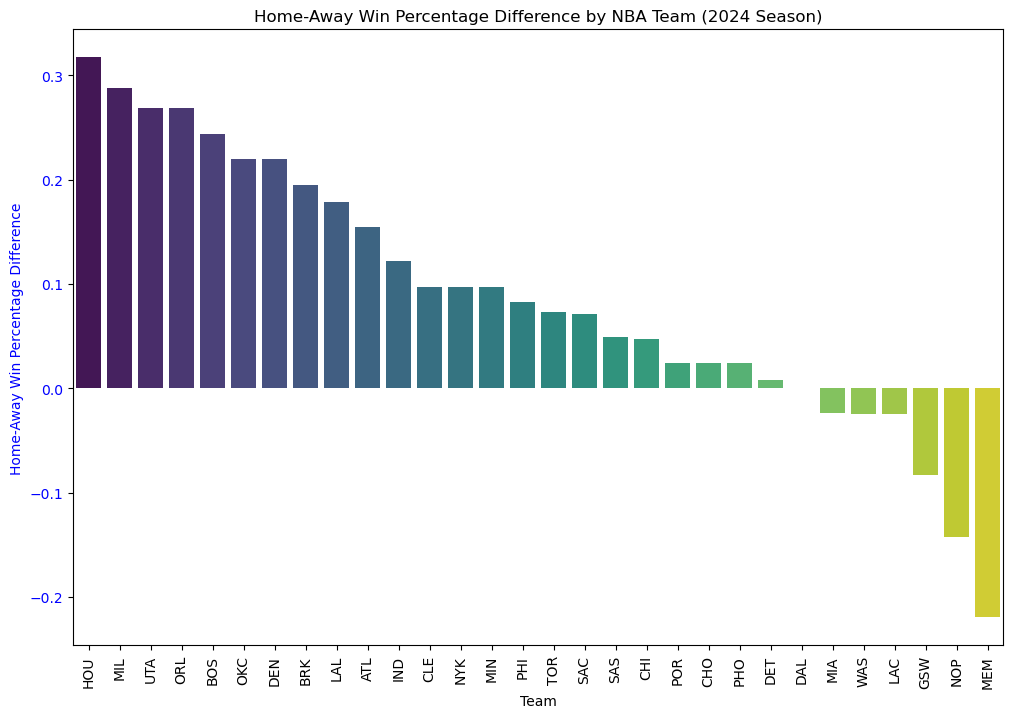

In [54]:
# Filter for home and away games
home_games = nba_2024_cleaned[nba_2024_cleaned['Home?'] == 'Y'].copy()
away_games = nba_2024_cleaned[nba_2024_cleaned['Home?'] == 'N'].copy()

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Tm')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Tm')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and average stadium fill into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and average stadium fill
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Add a legend
ax2.legend(loc='upper right')

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference by NBA Team (2024 Season)")
plt.show()

# Same thing for season before

data is set up the same way so don't have to do as much investigation

In [39]:
# List of NBA team abbreviations (example for the 2024 season)
teams = [
    "ATL", "BOS", "BRK", "CHO", "CHI", "CLE", "DAL", "DEN", "DET", "GSW",
    "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK",
    "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"
]

# Season year
year = 2023

# Base URL for NBA
base_url = "https://www.basketball-reference.com/teams/{TEAM}/{YEAR}_games.html"

# Initialize an empty list to store data
all_teams_data = []

# Loop through each team
for team in teams:
    print(f"Fetching data for {team}...")
    try:
        # Construct the URL for the team
        url = base_url.format(TEAM=team, YEAR=year)
        
        # Read the table from the page
        tables = pd.read_html(url)
        
        # Select the main schedule table (usually the first table)
        schedule = tables[0]  # Adjust index if necessary
        
        # Add a column for the team
        schedule['Team'] = team
        
        # Append to the list
        all_teams_data.append(schedule)
    except Exception as e:
        print(f"Failed to fetch data for {team}: {e}")

# Combine all teams into one DataFrame
combined_data = pd.concat(all_teams_data, ignore_index=True)

# Save to a CSV file
combined_data.to_csv(f"nba_{year}_season_data.csv", index=False)

print(f"All team data combined and saved as 'nba_{year}_season_data.csv'.")

Fetching data for ATL...
Fetching data for BOS...
Fetching data for BRK...
Fetching data for CHO...
Fetching data for CHI...
Fetching data for CLE...
Fetching data for DAL...
Fetching data for DEN...
Fetching data for DET...
Fetching data for GSW...
Fetching data for HOU...
Fetching data for IND...
Fetching data for LAC...
Fetching data for LAL...
Fetching data for MEM...
Fetching data for MIA...
Fetching data for MIL...
Fetching data for MIN...
Fetching data for NOP...
Fetching data for NYK...
Fetching data for OKC...
Fetching data for ORL...
Fetching data for PHI...
Fetching data for PHO...
Fetching data for POR...
Fetching data for SAC...
Fetching data for SAS...
Fetching data for TOR...
Fetching data for UTA...
Fetching data for WAS...
All team data combined and saved as 'nba_2023_season_data.csv'.


In [55]:
# confirmed it only includes regular season data
nba_2023 = pd.read_csv('nba_2023_season_data.csv')
nba_2023[nba_2023['Team'] == 'BOS'].head(2)

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
87,1,"Tue, Oct 18, 2022",7:30p,NaN,Box Score,NaN,Philadelphia 76ers,W,NaN,126,117,1,0,W 1,19156,2:31,NaN,BOS
88,2,"Fri, Oct 21, 2022",7:30p,NaN,Box Score,@,Miami Heat,W,NaN,111,104,2,0,W 2,19600,2:10,NaN,BOS


In [56]:
# remove header rows
nba_2023_v1 = nba_2023[~nba_2023['Date'].str.contains('Date', na=False)]

# confirm it worked
nba_2023_v1[nba_2023_v1['Date'] == 'Date']

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team


In [57]:
# drop unecessary columns
nba_2023_v2 = nba_2023_v1.drop(columns=['Unnamed: 3', 'Unnamed: 4'])
nba_2023_v2.head(2)

,G,Date,Start (ET),Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
0,1,"Wed, Oct 19, 2022",7:30p,NaN,Houston Rockets,W,NaN,117,107,1,0,W 1,17878,2:05,NaN,ATL
1,2,"Fri, Oct 21, 2022",7:30p,NaN,Orlando Magic,W,NaN,108,98,2,0,W 2,17822,2:12,NaN,ATL


In [58]:
# rename home/away column column
nba_2023_v2 = nba_2023_v2.rename(columns={'Unnamed: 5': 'Home?'})
nba_2023_v2['Home?'] = nba_2023_v2['Home?'].apply(lambda x: 'Y' if pd.isna(x) else 'N' if x == '@' else x)
nba_2023_v2.head(2)

,G,Date,Start (ET),Home?,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Attend.,LOG,Notes,Team
0,1,"Wed, Oct 19, 2022",7:30p,Y,Houston Rockets,W,NaN,117,107,1,0,W 1,17878,2:05,NaN,ATL
1,2,"Fri, Oct 21, 2022",7:30p,Y,Orlando Magic,W,NaN,108,98,2,0,W 2,17822,2:12,NaN,ATL


In [59]:
# rename other columns for clairty/so they're the same as mlb dataset
nba_2023_v3 = nba_2023_v2.rename(columns={
    'Unnamed: 7': 'W/L',
    'Unnamed: 8': 'OT',
    'Tm': 'Hpts',
    'Opp': 'Apts',
    'Opponent' : 'Opp',
    'Attend.': 'Attendance',
    'Team': 'Tm'
})
nba_2023_v3.head(2)

,G,Date,Start (ET),Home?,Opp,W/L,OT,Hpts,Apts,W,L,Streak,Attendance,LOG,Notes,Tm
0,1,"Wed, Oct 19, 2022",7:30p,Y,Houston Rockets,W,NaN,117,107,1,0,W 1,17878,2:05,NaN,ATL
1,2,"Fri, Oct 21, 2022",7:30p,Y,Orlando Magic,W,NaN,108,98,2,0,W 2,17822,2:12,NaN,ATL


In [60]:
nba_2023_cleaned = nba_2023_v3
nba_2023_cleaned.head(2)

,G,Date,Start (ET),Home?,Opp,W/L,OT,Hpts,Apts,W,L,Streak,Attendance,LOG,Notes,Tm
0,1,"Wed, Oct 19, 2022",7:30p,Y,Houston Rockets,W,NaN,117,107,1,0,W 1,17878,2:05,NaN,ATL
1,2,"Fri, Oct 21, 2022",7:30p,Y,Orlando Magic,W,NaN,108,98,2,0,W 2,17822,2:12,NaN,ATL


In [30]:
# save clean data to csv file
nba_2023_cleaned.to_csv("nba_2023_clean.csv", index=False)

# Visulization

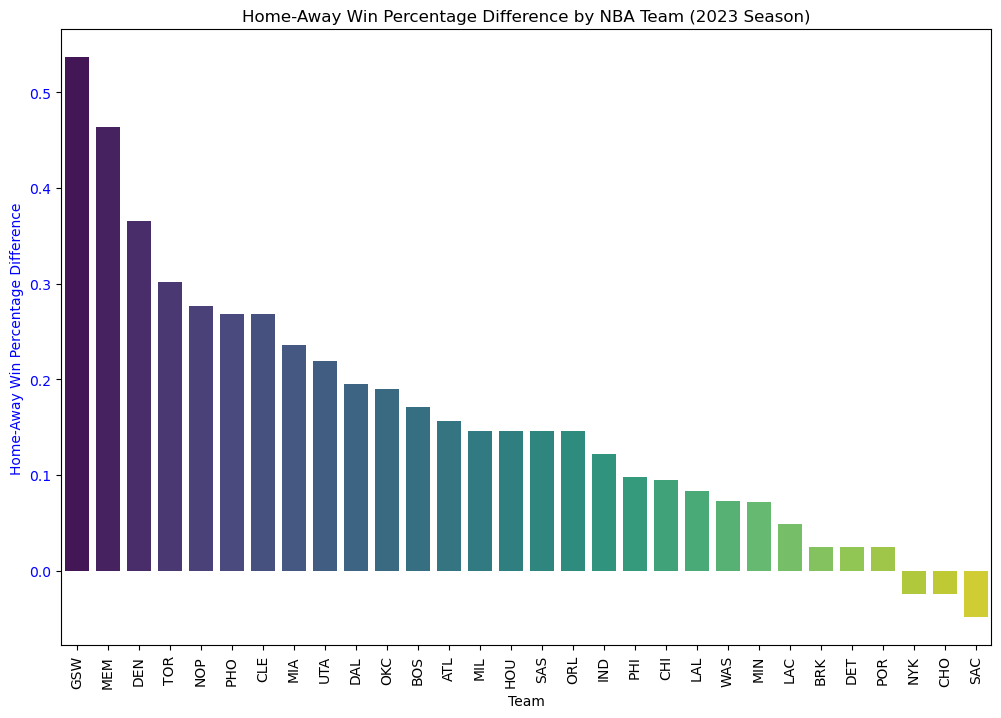

In [61]:
# Filter for home and away games
home_games = nba_2023_cleaned[nba_2023_cleaned['Home?'] == 'Y'].copy()
away_games = nba_2023_cleaned[nba_2023_cleaned['Home?'] == 'N'].copy()

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Tm')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Tm')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and average stadium fill into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and average stadium fill
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference by NBA Team (2023 Season)")
plt.show()

Messing around with elevation data

In [70]:
city_elevations = {
     'CHI': 594,  # Chicago
     'PHI': 39,   # Philadelphia
     'WAS': 12,   # Washington D.C.
     'DET': 617,  # Detroit
     'NYK': 33,   # New York
     'TOR': 243,  # Toronto
    'MIA': 6,    # Miami
    'DEN': 5280, # Denver
     'CLE': 643,  # Cleveland
     'POR': 50,   # Portland
     'DAL': 430,  # Dallas
     'CHO': 748,  # Charlotte
     'LAL': 305,  # Los Angeles
     'ORL': 82,   # Orlando
     'MIN': 833,  # Minnesota
     'BOS': 141,  # Boston
     'PHO': 1086, # Phoenix
     'SAS': 650,  # San Antonio
    'UTA': 4226, # Utah
     'OKC': 1201, # Oklahoma City
     'MEM': 337,  # Memphis
     'GSW': 43,   # Golden State
     'HOU': 43,   # Houston
     'LAC': 305,  # Los Angeles Clippers
     'IND': 725,  # Indiana
     'BKN': 33,   # Brooklyn
     'SAC': 30,   # Sacramento
     'MIL': 590,  # Milwaukee
     'NOP': 9,    # New Orleans
     'ATL': 1050  # Atlanta
}

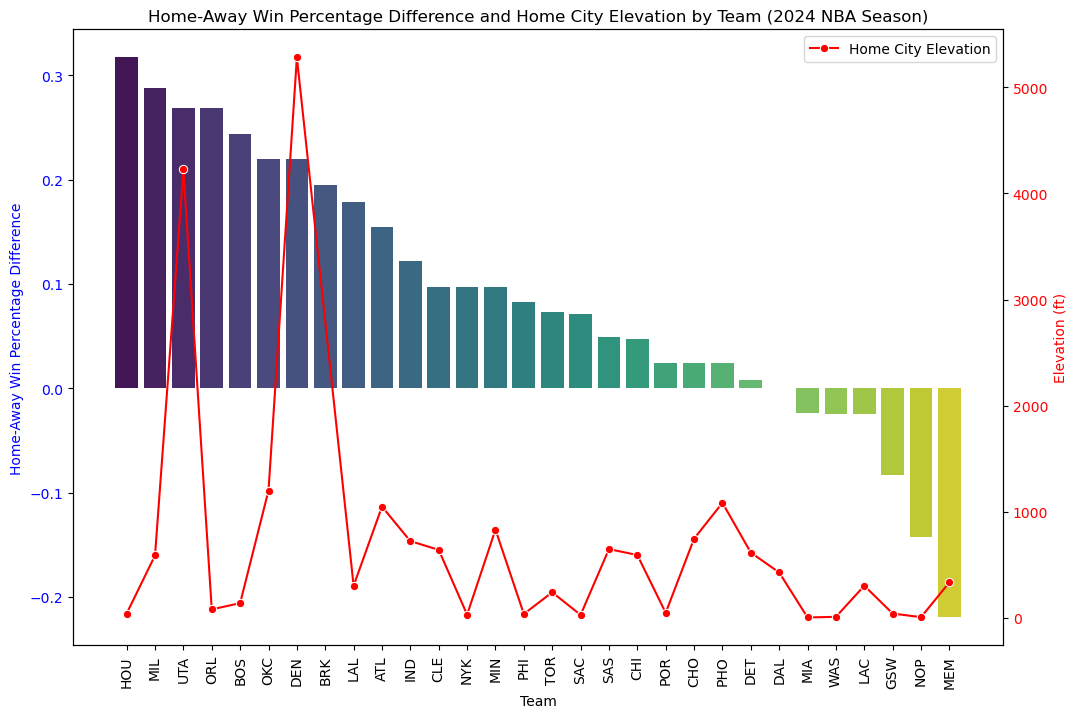

In [71]:
# Now, replace the arena capacity with city elevation in the code
# Filter for home and away games
home_games = nba_2024_cleaned[nba_2024_cleaned['Home?'] == 'Y'].copy()
away_games = nba_2024_cleaned[nba_2024_cleaned['Home?'] == 'N'].copy()

# Add city elevation to the DataFrame for both home and away games
home_games['City Elevation'] = pd.to_numeric(home_games['Tm'].map(city_elevations))

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Tm')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Tm')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and city elevation into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff,
    'City Elevation': home_games.groupby('Tm')['City Elevation'].first()  # Use first() to get the elevation for each home city
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and city elevation
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a secondary y-axis for the elevation data
ax2 = ax1.twinx()  # allows for two y-axes to the same x axis
sns.lineplot(x=team_stats.index, y=team_stats['City Elevation'], marker='o', color='red', ax=ax2, label='Home City Elevation')
ax2.set_ylabel('Elevation (ft)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
ax2.legend(loc='upper right')

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference and Home City Elevation by Team (2024 NBA Season)")
plt.show()

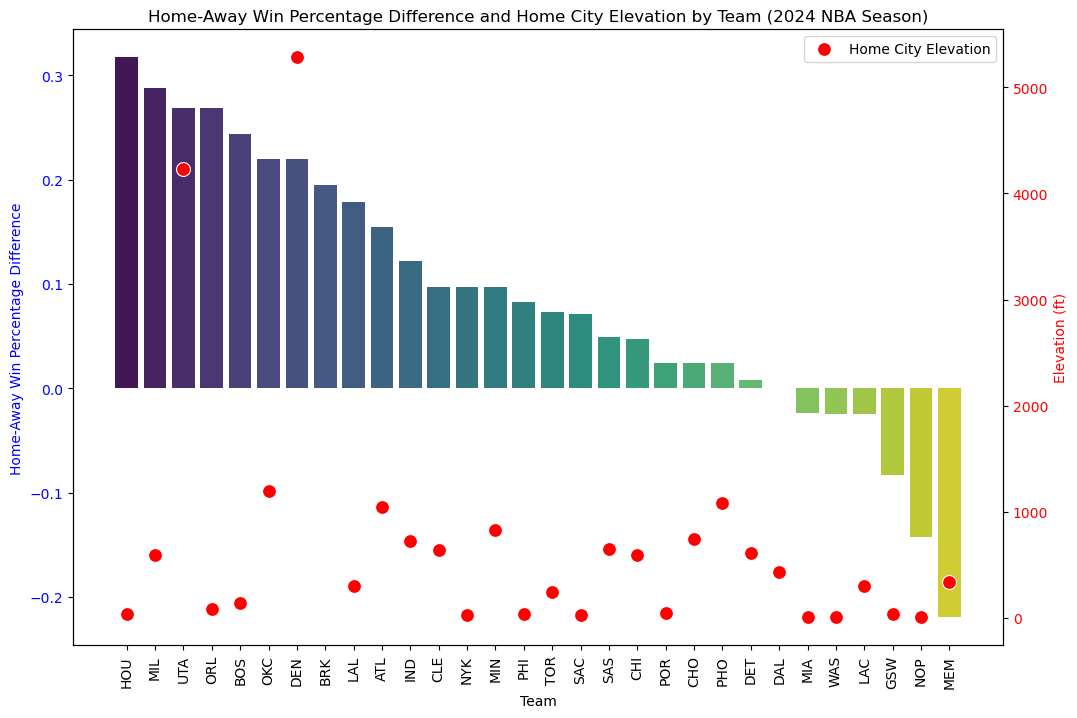

In [72]:
# Merge win percentage difference and city elevation into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff,
    'City Elevation': home_games.groupby('Tm')['City Elevation'].first()  # Use first() to get the elevation for each home city
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and city elevation
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference as bars
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a secondary y-axis for the elevation data
ax2 = ax1.twinx()  # Allows for two y-axes to the same x-axis
sns.scatterplot(x=team_stats.index, y=team_stats['City Elevation'], color='red', s=100, ax=ax2, label='Home City Elevation')
ax2.set_ylabel('Elevation (ft)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend for the dots
ax2.legend(loc='upper right')

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference and Home City Elevation by Team (2024 NBA Season)")
plt.show()

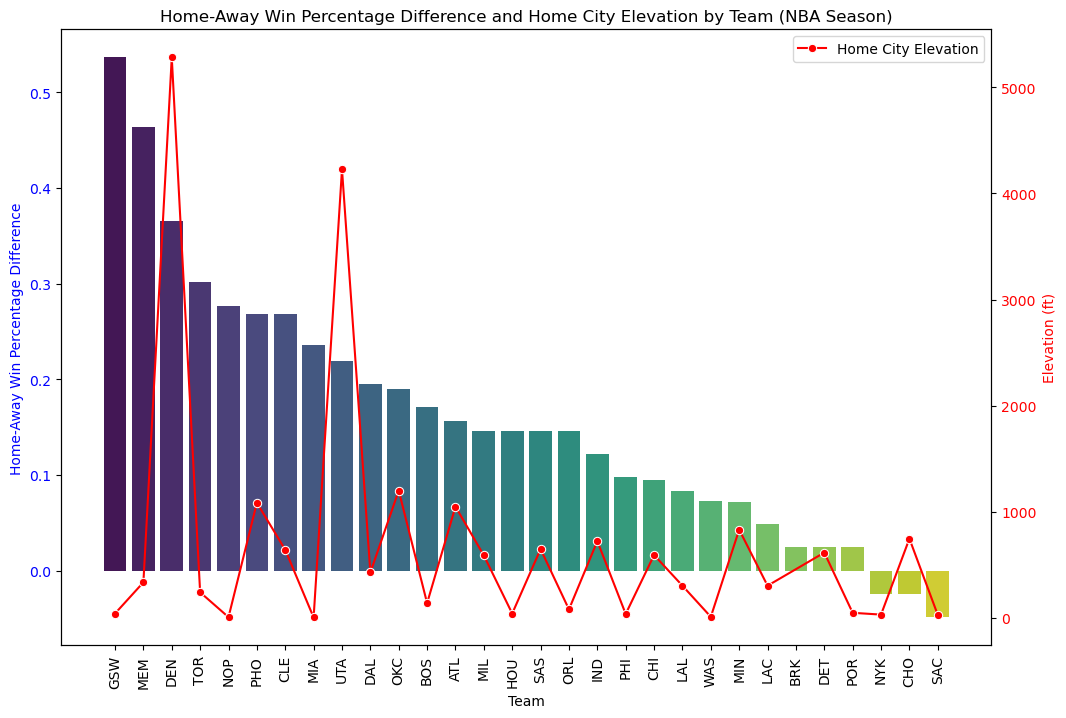

In [39]:
# Now, replace the arena capacity with city elevation in the code
# Filter for home and away games
home_games = nba_2023_cleaned[nba_2023_cleaned['Home?'] == 'Y'].copy()
away_games = nba_2023_cleaned[nba_2023_cleaned['Home?'] == 'N'].copy()

# Add city elevation to the DataFrame for both home and away games
home_games['City Elevation'] = pd.to_numeric(home_games['Tm'].map(city_elevations))

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Tm')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Tm')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and city elevation into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff,
    'City Elevation': home_games.groupby('Tm')['City Elevation'].first()  # Use first() to get the elevation for each home city
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and city elevation
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a secondary y-axis for the elevation data
ax2 = ax1.twinx()  # allows for two y-axes to the same x axis
sns.lineplot(x=team_stats.index, y=team_stats['City Elevation'], marker='o', color='red', ax=ax2, label='Home City Elevation')
ax2.set_ylabel('Elevation (ft)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
ax2.legend(loc='upper right')

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference and Home City Elevation by Team (NBA Season)")
plt.show()